# p23: Eigenvalues of perturbed Laplacian on [-1,1]x[-1,1]

We solve the following eigenvalue problem
$$
-(u_{xx} + u_{yy}) + f(x,y) u = \lambda u, \qquad -1 < x,y < 1, \qquad u=0 \quad \mbox{on boundary}
$$
where
$$
f(x,y) = \exp(20(y-x-1))
$$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from chebPy import cheb
from numpy import meshgrid,dot,eye,kron,zeros,reshape,pi,real,imag
from numpy import diag,exp,argsort,linspace,inf
from matplotlib.pyplot import figure,subplot,plot,title,contour
from scipy.linalg import eig,norm
from scipy.interpolate import interp2d

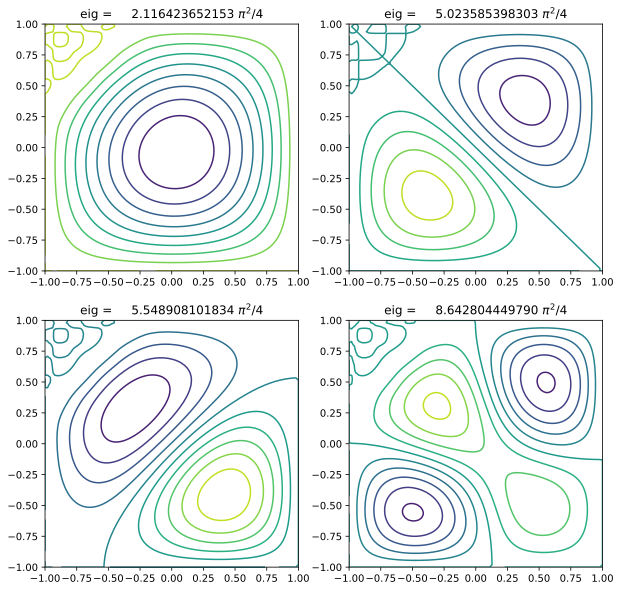

In [2]:
# Set up tensor product Laplacian and compute 4 eigenmodes
N = 16; D,x = cheb(N); y = x;
xx,yy = meshgrid(x[1:N],y[1:N])
xx = reshape(xx,(N-1)**2)
yy = reshape(yy,(N-1)**2)
D2 = dot(D,D); D2 = D2[1:N,1:N]; I = eye(N-1)
L = -kron(I,D2) - kron(D2,I)
L = L + diag(exp(20*(yy-xx-1)))
D,V = eig(L); D = real(D); V = real(V)
ii = argsort(D); ii = ii[0:4]; D = D[ii]; V = V[:,ii]

# Reshape them to 2D grid, interpolate to finer grid, and plot
fine = linspace(-1.0,1.0,100,True);
uu = zeros((N+1,N+1));

figure(figsize=(10,10))
for i in range(4):
    uu[1:N,1:N] = reshape(V[:,i],(N-1,N-1))
    uu = uu/norm(uu,inf)
    f = interp2d(x,y,uu,kind='cubic')
    uuu = f(fine,fine)
    subplot(2,2,i+1)
    contour(fine,fine,uuu,10)
    title("eig = %18.12f $\pi^2/4$"%(D[i]/(pi**2/4)))
    